# Markov Chain Monte Carlo (MCMC)

Jiachuan Xu, Feb 19

## Contents

1. Motivation for MCMC

2. What is MCMC?

3. MCMC algorithms

4. Examples


## 1. Motivation for MCMC

Conceptual steps of doing Bayesian statistical inference:

- Come up with a model to calculate $p(D|M(\vec{\theta}),I)$
- Choose the prior $p(\vec{\theta}|M,I)$
- Calculate the posterior pdf $p(M(\vec{\theta})|D,I)$:

$$
p(M(\vec{\theta})|D,I)=\frac{p(D|M(\vec{\theta}), I)\times p(\vec{\theta}|M,I)\times p(M|I)}{p(D|I)}
$$

- Find the best model parameter $\vec{\theta}$ (sample the posterior pdf),

    get posterior mean for $\theta_m$,
$$\int \theta_m p(M(\vec{\theta})|D,I)d\vec{\theta}$$

    Model comparison

$$E(M)=\int p(D|M(\vec{\theta}),I)p(\vec{\theta}|M,I)d\vec{\theta}$$

    e.t.c.

Exhausive grid search? *inefficient* and *inaccurate*!

Generic Monte Carlo? *inefficient* when the posterior is sensitive to parameter!

If we can generate a set of random vector $\{\vec{\theta}_j\}$ s.t. $\vec{\theta}\sim p(\vec{\theta}|D,I)$

- [x] Sample specific distribution
- [x] Calculate integral: $$\int g(\vec{\theta})p(\vec{\theta})d\vec{\theta}\Longleftrightarrow\frac{1}{M}\Sigma_{j=1}^{M}g(\vec{\theta_j})$$
<!-- [x] Simulate stochaostic process -->

MCMC is one of the methods drawing sample from specific pdf: **They return a sample of points, or chain, from the $k$-dimensional parameter space, with a distribution asymptotically proportional to $p(\theta)$**

## 2. Markov Chain Monte Carlo

- Markov Chain: consider a sequence of random variables {$X_n,n\geq0$}, it is a Markov chain if $\forall s_0,s_1,...,s_n,s_{n+1}\in S$, $\forall n\in N^+$, and $p(X_{0}=s_0, X_{1}=s_1,...,X_{n}=s_n)>0$
$$p(X_{n+1}=s_{n+1}|X_n=s_n,X_{n-1}=s_{n-1},...,X_{0}=s_0)=p(X_{n+1}=s_{n+1}|X_n=s_n)$$
$$p(X_{n+1}=s_{n+1})=p(X_{n+1}=s_{n+1}|X_n=s_n)p(X_{n}=s_{n}|X_{n-1}=s_{n-1})...p(X_0=s_0)$$
Given the present value, past and future values are indepentent. Markov chain is "memoryless".

- Transition matrix: given state $X_n=s_i$, the probability that $X_{n+1}=s_j$ is. 
$$T_{ij}=p(X_{n+1}=s_j|X_{n}=s_i)$$
$\Sigma_{j}T_{ij}=1$, $T_{ij}>0$

- Consider the initial conditin $\pi(0)=(\pi_0(0), \pi_1(0), ..., \pi_i(0), ...)$, $\pi_i(0)$ is the probability that $X_0=s_i$, $s_i\in S$, the propertiy of a Markov chain is totally decided by the initial condition $\pi(0)$ and the single step transitin matrix $T$:
$$\pi(n)=\pi(0)T^{n}$$

- Stationary probability vector $\pi$: $$\pi T = \pi$$

- For irreducible $T$, no matter what's the initial condition, the chain could reach stationary: $$lim_{k\rightarrow\infty}(T^k)_{ij}=\pi_j$$ where $\pi$ is the stationary probability vector.

- Detailed balance condition:
$$\pi_i T_{ij}=\pi_j T_{ji}$$
$$detailed\ balance \Rightarrow can\ reach\ stationary\ distribution$$

## 3. MCMC algorithm

### 3.1 Metropolis-Hastings

In order to sample a set of points following distribution $P(\vec{x})$:
- randomly selecting a point $\vec{x}_0$ as the starting point of the chain $\{x_t\}$
- determine a proposal density function $g(\vec{x}|\vec{x}_t)$, which is used to propose a new point in parameter space according to the current point $\vec{x}_t$. It could be arbitary function (if you take $g(\vec{x}_{t+1}|\vec{x}_t)=N(\vec{x}_t,\sigma)$, then the proposition is simply a random walk)
- for $t\geq 0$, do the following iterations
    
    1. propose a new point $x_{t+1}$ according to $g(\vec{x}|\vec{x}_t)$
    2. calculate the acceptance rate $p_{acc}$:
    $$p_{acc}(\vec{x}_{t+1}=s_j|\vec{x}_t=s_i)=min(\frac{g(s_i|s_j)p(s_j)}{g(s_j|s_i)p(s_i)}, 1)$$
    where $p(\vec{x})$ is a function **proportional to** $P(\vec{x})$ and is easy to calculate. $s_i,s_j\in S$
    3. if $p_{acc}\geq 1$, the proposition is always accepted, and $\vec{x}_{t+1}$ is appended to the chain. If $p_{acc}<1$, the proposition is accepted by a change of $p_{acc}$. If $\vec{x}_{t+1}$ is rejected, $\vec{x}_t$ is appended to the chain again.
- after sufficiently long time, the chain should converge: the points in the sample should follow a distribution very close to $P(\vec{x})$

Why M-H algorithm works?

Intuition:
- The M-H method would make regions with higher posterior more easily to be sampled.
- Take any two points $\vec{x}_1$ and $\vec{x}_2$, assume $p(\vec{x}_1)>p(\vec{x}_2)$, on average $\vec{x}_1$ is over-sampled than $\vec{x}_2$ by a factor of $\frac{p(\vec{x}_1)}{p(\vec{x}_2)}$

Proof:
- Assume now we have a sample following the distribution of $P(\vec{x})$ in parameter space $S$, consider two points $s_i,s_j\in S$, the probability transition between them is:
$$s_i\rightarrow s_j: p_{acc}(s_j|s_i)g(s_j|s_i)p(s_i)=min(g(s_j|s_i)p(s_i), g(s_i|s_j)p(s_j)) $$
$$s_j\rightarrow s_i: p_{acc}(s_i|s_j)g(s_i|s_j)p(s_j)=min(g(s_j|s_i)p(s_i), g(s_i|s_j)p(s_j)) $$
satisfying the detailed balance condition
- The distribution $P(\vec{x})$ is the unique stationary probability density of the transition matrix.
- As the chain converges, the distribution of the sample should also converge to $P(\vec{x})$

[Here is an illustration of M-H algorithm](https://www.youtube.com/embed/3E33AScbU4s?start=248)

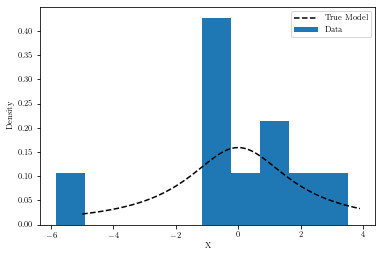

In [4]:
### Example: find optimal model parameter
# Author: Jake VanderPlas (adapted to PyMC3 by Brigitta Sipocz)
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general
import numpy as np
from scipy.stats import cauchy
from matplotlib import pyplot as plt
from astroML.plotting.mcmc import convert_to_stdev

import pymc3 as pm

# ----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
if "setup_text_plots" not in globals():
    from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=True)


def cauchy_logL(xi, sigma, mu):
    """Equation 5.74: cauchy likelihood"""
    xi = np.asarray(xi)
    n = xi.size
    shape = np.broadcast(sigma, mu).shape

    xi = xi.reshape(xi.shape + tuple([1 for s in shape]))

    return ((n - 1) * np.log(sigma)
            - np.sum(np.log(sigma ** 2 + (xi - mu) ** 2), 0))


# ----------------------------------------------------------------------
# Draw the sample from a Cauchy distribution
np.random.seed(44)
mu_0 = 0
gamma_0 = 2
xi = cauchy(mu_0, gamma_0).rvs(10)

# have a look at the data
xi_range = np.arange(int(min(xi)), int(max(xi))+1, 0.1)
cau = lambda x: gamma_0**2/(gamma_0**2+(x-mu_0)**2)/np.pi/gamma_0
fig = plt.figure()
plt.hist(xi,density=True,label="Data")
plt.plot(xi_range, cau(xi_range), ls='--', c='black', label='True Model')
plt.xlabel('X')
plt.ylabel('Density')
plt.legend()
plt.show()

In [5]:
# ----------------------------------------------------------------------
# Set up and run MCMC:
with pm.Model():
    mu = pm.Uniform('mu', -5, 5)
    log_gamma = pm.Uniform('log_gamma', -10, 10)

    # set up our observed variable x
    x = pm.Cauchy('x', mu, np.exp(log_gamma), observed=xi)

    trace = pm.sample(draws=12000, tune=1000, cores=1)

# compute histogram of results to plot below
L_MCMC, mu_bins, gamma_bins = np.histogram2d(trace['mu'],
                                             np.exp(trace['log_gamma']),
                                             bins=(np.linspace(-5, 5, 41),
                                                   np.linspace(0, 5, 41)))
L_MCMC[L_MCMC == 0] = 1E-16  # prevents zero-division errors

# ----------------------------------------------------------------------
# Compute likelihood analytically for comparison
mu = np.linspace(-5, 5, 70)
gamma = np.linspace(0.1, 5, 70)
logL = cauchy_logL(xi, gamma[:, np.newaxis], mu)
logL -= logL.max()

p_mu = np.exp(logL).sum(0)
p_mu /= p_mu.sum() * (mu[1] - mu[0])

p_gamma = np.exp(logL).sum(1)
p_gamma /= p_gamma.sum() * (gamma[1] - gamma[0])

hist_mu, bins_mu = np.histogram(trace['mu'], bins=mu_bins, density=True)
hist_gamma, bins_gamma = np.histogram(np.exp(trace['log_gamma']),
                                      bins=gamma_bins, density=True)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [log_gamma, mu]
Sampling chain 1, 0 divergences: 100%|██████████| 13000/13000 [00:08<00:00, 1535.35it/s]


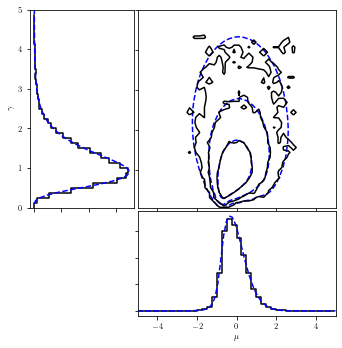

In [6]:
# ----------------------------------------------------------------------
# plot the results
fig = plt.figure(figsize=(5, 5))

# first axis: likelihood contours
ax1 = fig.add_axes((0.4, 0.4, 0.55, 0.55))
ax1.xaxis.set_major_formatter(plt.NullFormatter())
ax1.yaxis.set_major_formatter(plt.NullFormatter())

ax1.contour(mu, gamma, convert_to_stdev(logL),
            levels=(0.683, 0.955, 0.997),
            colors='b', linestyles='dashed')

ax1.contour(0.5 * (mu_bins[:-1] + mu_bins[1:]),
            0.5 * (gamma_bins[:-1] + gamma_bins[1:]),
            convert_to_stdev(np.log(L_MCMC.T)),
            levels=(0.683, 0.955, 0.997),
            colors='k')

# second axis: marginalized over mu
ax2 = fig.add_axes((0.1, 0.4, 0.29, 0.55))
ax2.xaxis.set_major_formatter(plt.NullFormatter())
ax2.plot(hist_gamma, 0.5 * (bins_gamma[1:] + bins_gamma[:-1]
                            - bins_gamma[1] + bins_gamma[0]),
         '-k', drawstyle='steps')
ax2.plot(p_gamma, gamma, '--b')
ax2.set_ylabel(r'$\gamma$')
ax2.set_ylim(0, 5)

# third axis: marginalized over gamma
ax3 = fig.add_axes((0.4, 0.1, 0.55, 0.29))
ax3.yaxis.set_major_formatter(plt.NullFormatter())
ax3.plot(0.5 * (bins_mu[1:] + bins_mu[:-1]), hist_mu,
         '-k', drawstyle='steps-mid')
ax3.plot(mu, p_mu, '--b')
ax3.set_xlabel(r'$\mu$')
plt.xlim(-5, 5)

plt.show()

How to do model selection using MCMC?

To compute odds ratio, we have to compute
$$L(M)=\int p(\vec{\theta}|D,I)d\vec{\theta}$$
However, the sample point density is proportional to $p(\vec{\theta})$

$$\rho(\vec{\theta})=CNp(\vec{\theta})$$
where $p(\vec{\theta})$ is the posterior given data and prior information. After integration along $\vec{\theta}$, we have
$$L(M)=1/C$$
So that model selectin problem is converted to density estimation problem:
$$L(M)=\frac{Np(\vec{\theta})}{\rho(\theta)}$$

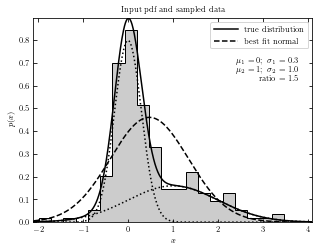

In [2]:
# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import norm
from astroML.density_estimation import GaussianMixture1D

#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
if "setup_text_plots" not in globals():
    from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=True)

#------------------------------------------------------------
# Generate the data
mu1_in = 0
sigma1_in = 0.3
mu2_in = 1
sigma2_in = 1
ratio_in = 1.5
N = 200

np.random.seed(10)
gm = GaussianMixture1D([mu1_in, mu2_in],
                       [sigma1_in, sigma2_in],
                       [ratio_in, 1])
x_sample = gm.sample(N)[0]
#random_state = np.random.RandomState(seed=10)

#x_sample = np.concatenate([random_state.normal(mu1_in, sigma1_in, int(N/(1+ratio_in)*ratio_in)),
#                    random_state.normal(mu2_in, sigma2_in, int(N/(1+ratio_in)*1))]).reshape(-1, 1)

#------------------------------------------------------------
# Get the MLE fit for a single gaussian
sample_mu = np.mean(x_sample)
sample_std = np.std(x_sample, ddof=1)

#------------------------------------------------------------
# Plot the sampled data
fig, ax = plt.subplots(figsize=(5, 3.75))

ax.hist(x_sample, 20, histtype='stepfilled', density=True, fc='#CCCCCC')
x = np.linspace(-2.1, 4.1, 1000)

factor1 = ratio_in / (1. + ratio_in)
factor2 = 1. / (1. + ratio_in)

ax.plot(x, gm.pdf(x), '-k', label='true distribution')
ax.plot(x, gm.pdf_individual(x), ':k')

ax.plot(x, norm.pdf(x, sample_mu, sample_std), '--k', label='best fit normal')

ax.legend(loc=1)

ax.set_xlim(-2.1, 4.1)

ax.set_xlabel('$x$')
ax.set_ylabel('$p(x)$')
ax.set_title('Input pdf and sampled data')
ax.text(0.95, 0.80, ('$\mu_1 = 0;\ \sigma_1=0.3$\n'
                     '$\mu_2=1;\ \sigma_2=1.0$\n'
                     '$\mathrm{ratio}=1.5$'),
        transform=ax.transAxes, ha='right', va='top')
plt.show()

![alt text](https://www.astroml.org/_images/fig_model_comparison_mcmc_1.png "Posterior Contour")

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [log_error, log_sigma, mu]
Sampling 2 chains, 183 divergences: 100%|██████████| 12000/12000 [00:18<00:00, 644.42draws/s]
There were 181 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.5744492824824498, but should be close to 0.8. Try to increase the number of tuning steps.
There were 2 divergences after tuning. Increase `target_accept` or reparameterize.
The rhat statistic is larger than 1.05 for some parameters. This indicates slight problems during sampling.
The estimated number of effective samples is smaller than 200 for some parameters.


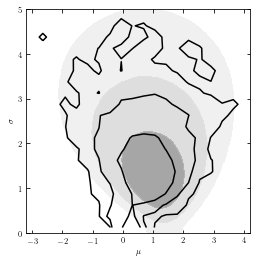

In [3]:
# Author: Jake VanderPlas (adapted to PyMC3 by Brigitta Sipocz)
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general
import numpy as np
from matplotlib import pyplot as plt

import pymc3 as pm

from astroML.plotting.mcmc import convert_to_stdev
from astroML.plotting import plot_mcmc

# ----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
if "setup_text_plots" not in globals():
    from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=True)


def gaussgauss_logL(xi, ei, mu, sigma):
    """Equation 5.22: gaussian likelihood"""
    ndim = len(np.broadcast(sigma, mu).shape)

    xi = xi.reshape(xi.shape + tuple(ndim * [1]))
    ei = ei.reshape(ei.shape + tuple(ndim * [1]))

    s2_e2 = sigma ** 2 + ei ** 2
    return -0.5 * np.sum(np.log(s2_e2) + (xi - mu) ** 2 / s2_e2, 0)


# ------------------------------------------------------------
# Select the data
np.random.seed(5)
mu_true = 1.
sigma_true = 1.
N = 10
ei = 3 * np.random.random(N)
xi = np.random.normal(mu_true, np.sqrt(sigma_true ** 2 + ei ** 2))

# ----------------------------------------------------------------------
# Set up MCMC for our model parameters: (mu, sigma, ei)
with pm.Model() as model:
    mu = pm.Uniform('mu', -10, 10)
    log_sigma = pm.Uniform('log_sigma', -10, 10)
    log_error = pm.Uniform('log_error', -10, 10, shape=(N,))

    def sigma_m(log_sigma, log_error):
        return np.sqrt(np.exp(log_sigma) ** 2 + np.exp(log_error)**2)

    x = pm.Normal('x', mu=mu, sd=sigma_m(log_sigma, log_error), observed=xi)

    # perform the MCMC sampling
    trace = pm.sample(draws=4500, tune=1500)

# ------------------------------------------------------------
# Extract the MCMC traces

fig = plt.figure(figsize=(5, 3.75))
ax, = plot_mcmc([trace['mu'], np.exp(trace['log_sigma'])], fig=fig,
                limits=[(-3.2, 4.2), (0, 5)],
                bounds=(0.08, 0.12, 0.95, 0.95),
                labels=(r'$\mu$', r'$\sigma$'),
                levels=[0.683, 0.955, 0.997],
                colors='k')

# ----------------------------------------------------------------------
# Compute and plot likelihood with known ei for comparison
# (Same as fig_likelihood_gaussgauss)
sigma = np.linspace(0.01, 5, 41)
mu = np.linspace(-3.2, 4.2, 41)

logL = gaussgauss_logL(xi, ei, mu, sigma[:, np.newaxis])
logL -= logL.max()

im = ax.contourf(mu, sigma, convert_to_stdev(logL),
                 levels=(0, 0.683, 0.955, 0.997),
                 cmap=plt.cm.binary_r, alpha=0.5)
im.set_clim(0, 1.1)

ax.set_xlabel(r'$\mu$')
ax.set_ylabel(r'$\sigma$')
ax.set_xlim(-3.2, 4.2)
ax.set_ylim(0, 5)

ax.set_aspect(1. / ax.get_data_ratio())

plt.show()

In [17]:
# Author: Jake VanderPlas (adapted to PyMC3 by Brigitta Sipocz)
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats

import pymc3 as pm
import theano.tensor as tt

from astroML.plotting import plot_mcmc

# ----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
if "setup_text_plots" not in globals():
    from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=True)

# ----------------------------------------------------------------------
# Set up dataset: gaussian signal in a uniform background
np.random.seed(0)

N = 100

A_true = 0.3
W_true = 10
x0_true = 6
sigma_true = 0.3

signal = stats.norm(x0_true, sigma_true)
background = stats.uniform(0, W_true)

x = np.random.random(N)
i_sig = x < A_true
i_bg = ~i_sig
x[i_sig] = signal.rvs(np.sum(i_sig))
x[i_bg] = background.rvs(np.sum(i_bg))


# ----------------------------------------------------------------------
# Set up MCMC sampling
with pm.Model():
    A = pm.Uniform('A', 0, 1)
    x0 = pm.Uniform('x0', 0, 10)
    log_sigma = pm.Uniform('log_sigma', -5, 5)

    def sigbg_like(x):
        """signal + background likelihood"""
        sigma = np.exp(log_sigma)
        return tt.sum(np.log(A * np.exp(-0.5 * ((x - x0) / sigma) ** 2)
                             / np.sqrt(2 * np.pi) / sigma + (1 - A) / W_true))

    SigBG = pm.DensityDist('sigbg',
                           logp=sigbg_like,
                           observed=x)
    trace = pm.sample(draws=5000, tune=1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [log_sigma, x0, A]
Sampling 2 chains, 0 divergences: 100%|██████████| 12000/12000 [00:06<00:00, 1925.06draws/s]


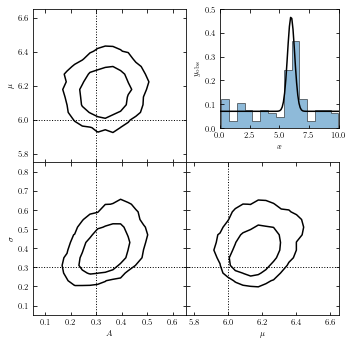

In [18]:
# ------------------------------------------------------------
# Plot the results
fig = plt.figure(figsize=(5, 5))
ax_list = plot_mcmc([trace[s] for s in ['A', 'x0']] + [np.exp(trace['log_sigma']),],
                    limits=[(0.05, 0.65), (5.75, 6.65), (0.05, 0.85)],
                    labels=[r'$A$', r'$\mu$', r'$\sigma$'],
                    bounds=(0.1, 0.1, 0.95, 0.95),
                    true_values=[A_true, x0_true, sigma_true],
                    fig=fig, colors='k')

ax = plt.axes([0.62, 0.62, 0.33, 0.33])
x_pdf = np.linspace(0, 10, 100)
y_pdf = A_true * signal.pdf(x_pdf) + (1 - A_true) * background.pdf(x_pdf)

ax.hist(x, 15, density=True, histtype='stepfilled', alpha=0.5)
ax.plot(x_pdf, y_pdf, '-k')

ax.set_xlim(0, 10)
ax.set_ylim(0, 0.5)
ax.set_xlabel('$x$')
ax.set_ylabel(r'$y_{\rm obs}$')

plt.show()

### 3.2 Affine-invariant MCMC

Motivation: M-H algorithm could have high rejection rate, slow convergence if the parameters are highly correlated.

![alt text](ast502_lecture9_figs/illustration_emcee.png "illustration of affine invariant mcmc")

In [7]:
### comparison between emcee and MH
### Credit: Pavlos Protopapas
import numpy as np
import emcee

ndim=2
ee=0.01

def lnprob(x):
    return (-(x[0]-x[1])**2 / (2*ee) - (x[0]+x[1])**2/2)
    
# We'll sample with 250 walkers.
nwalkers = 250

# Choose an initial set of positions for the walkers.
p0 = [np.random.rand(ndim) for i in range(nwalkers)]

# Initialize the sampler with the chosen specs.
sampler = emcee.EnsembleSampler(nwalkers, ndim, lnprob)

# Run 100 steps as a burn-in.
pos, prob, state = sampler.run_mcmc(p0, 100)

# Reset the chain to remove the burn-in samples.
sampler.reset()

# Starting from the final position in the burn-in chain, sample for 1000
# steps.
sampler.run_mcmc(pos, 1000, rstate0=state)

# Print out the mean acceptance fraction. In general, acceptance_fraction
# has an entry for each walker so, in this case, it is a 250-dimensional
# vector.
print("Mean acceptance fraction:", np.mean(sampler.acceptance_fraction))

Mean acceptance fraction: 0.7143160000000001


In [10]:
def px(x,y):
    return np.exp(-(x-y)**2 / (2*ee) - (x+y)**2/2)
#create a simple Metropolis Hastings function
sig =0.05
def MH_simple2(p, n, sig, T, x0, y0):
    np.random.seed(668)
    x_prev = x0
    y_prev = y0
    x=[]; y=[]
    k=1
    i=0

    
    while i<n:
        
        x_star = np.random.normal(x_prev, sig)
        y_star = np.random.normal(y_prev, sig)
        
        
        P_star = p(x_star, y_star)
        P_prev = p(x_prev, y_prev)
        U =  np.random.uniform()
        
        E_star = -np.log(P_star)
        E_prev = -np.log(P_prev)
        
        A =  np.exp(-(1.0/T) * (E_star-E_prev))
        if U < A:
            x.append(x_star); y.append(y_star); 
            i = i + 1
            x_prev = x_star; y_prev = y_star
        else :
            x.append(x_prev); y.append(y_prev); 
            x_prev = x[i] ; y_prev = y[i]  
            i = i + 1
     
            k=k+1
    return x,y,k

x0 = np.random.uniform(low=-1, high=1)
y0 = np.random.uniform(low=-1, high=1)
T=1.0
xH,yH, k = MH_simple2(px, 250000, sig, T, x0, y0)

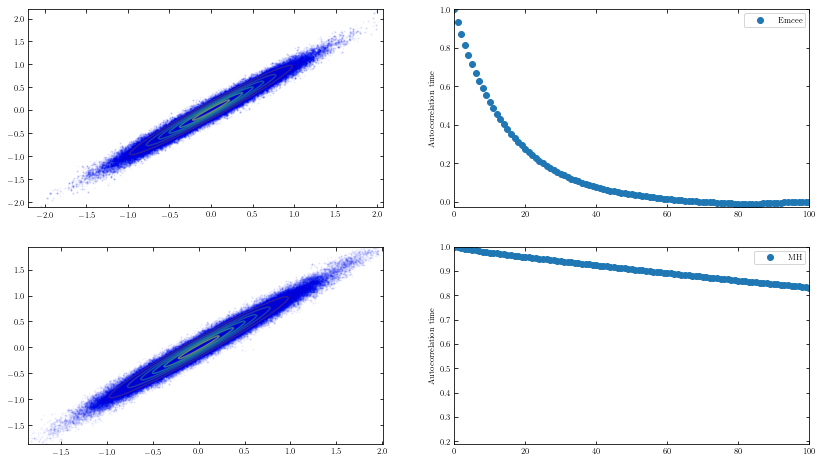

In [16]:
plt.figure(figsize=[14,8])
xs=(sampler.flatchain[:,0])
ys=(sampler.flatchain[:,1])
p = lambda x,y: np.exp(-(x-y)**2 / (2*ee) - (x+y)**2/2) 

xx= np.linspace(-1,1,100)
yy= np.linspace(-1,1,100)
M = np.empty((100,100))
i=0
for x in xx:
    j=0
    for y in yy:
        M[j,i]=p(x,y)
        j +=1
    i +=1
plt.subplot(2,2,1)
#sns.kdeplot(xs, ys)
plt.scatter(xs, ys, alpha=0.04, s=1.0)

plt.contour(xx,yy,M, alpha=0.6)
plt.subplot(2,2,2)
plt.acorr(xs,  normed=True, usevlines=False, maxlags=1000, label=u'Emcee')
plt.legend()
plt.ylabel('Autocorrelation time')
plt.xlim( (0,100))
plt.subplot(2,2,3)
plt.scatter(xH, yH, alpha=0.04, s=1.0)
plt.contour(xx,yy,M, alpha=0.6)
plt.subplot(2,2,4)
plt.acorr(xH,  normed=True, usevlines=False, maxlags=1000, label=u'MH')
plt.xlim( (0,100))
plt.legend()
plt.ylabel('Autocorrelation time')

plt.show()

## Caveats

1. Check whether the chains converge(Gelman-Rubin test, or simply Figure-of-Merit) and drop the burnin phase
2. Check the sample size if much larger than autocorrelation time
3. If the sampler has low acceptance rate, something bad could happen, e.g. the posterior is multimodal
4. Change init point to avoid local minima, change the step size to show the results are robust
5. Accuracy depends on your needs: model comparison requires higher accuracy than finding the best model parameter.

![alt text](ast502_lecture9_figs/FoM_DE_5000.pdf "FoM")

In [21]:
### Converge for a 560 x 1000 MCMC? Test by FoM
### This is a sample code showing how to test the chain convergence
### by calculating FoM
### The chain file format is ascii with header
### "param_1 param_2 ... param_n"
### followed by numbers of lines, each line contains a point in param space
### Since the chain file is too large, I'm not gonna to push them to github
"""
import numpy as np
import os
from numpy.linalg import inv
from numpy.linalg import det

# init settings

fnames=[
        "like_WFIRST_KL_SN10_opti_shear_shear_sys_sigmae0.05_5000",
        "like_WFIRST_KL_SN10_opti_shear_shear_cos_sigmae0.05_5000",
        ]
filedir = "/home/jiachuanxu/Workspace/KL/KL_WFIRST/chains_ocelote/"
start_index = 0
subchain_len = 28000
num_subchain = 100
steps = np.arange(start_index, start_index+num_subchain*subchain_len, subchain_len)
FOMDE=np.zeros([num_subchain, 2])

# read file
filen1=filedir+fnames[0]
filen2=filedir+fnames[1]
d1 = np.genfromtxt(filen1,skip_header=0,skip_footer=0)
d2 = np.genfromtxt(filen2,skip_header=0,skip_footer=0)

# Looping through chains
for i in range(0,num_subchain):
    cov1=np.cov(d1[start_index+i*subchain_len:start_index+(i+1)*subchain_len:,:],rowvar=False)
    cov2=np.cov(d2[start_index+i*subchain_len:start_index+(i+1)*subchain_len:,:],rowvar=False)
    
    covDE1=cov1[np.ix_([3,4],[3,4])]
    covDE2=cov2[np.ix_([3,4],[3,4])]
    
    FOMDE[i,0]=(np.power(det(inv(covDE1)),1./2))
    FOMDE[i,1]=(np.power(det(inv(covDE2)),1./2))

fig = plt.figure()
plt.title("FoM of (w0,wa) for 560x5000 MCMC")
plt.plot(steps,FOMDE[:,0], label="KL sys")
plt.plot(steps,FOMDE[:,1], label="KL cos")

plt.ylim([10,80])
plt.legend()
plt.xlabel("Index")
plt.ylabel("FoM")
plt.arrow(140000, 38,0,-5, color='black',lw=2) # KL cos
plt.arrow(1120000, 23,0,5, color='black',lw=2) # KL sys
plt.axhline(33,ls=':',c='green')
plt.axhline(28,ls=':',c='y')
plt.show()
"""

'\nimport numpy as np\nimport os\nfrom numpy.linalg import inv\nfrom numpy.linalg import det\n\n# init settings\n\nfnames=[\n        "like_WFIRST_KL_SN10_opti_shear_shear_sys_sigmae0.05_5000",\n        "like_WFIRST_KL_SN10_opti_shear_shear_cos_sigmae0.05_5000",\n        ]\nfiledir = "/home/jiachuanxu/Workspace/KL/KL_WFIRST/chains_ocelote/"\nstart_index = 0\nsubchain_len = 28000\nnum_subchain = 100\nsteps = np.arange(start_index, start_index+num_subchain*subchain_len, subchain_len)\nFOMDE=np.zeros([num_subchain, 2])\n\n# read file\nfilen1=filedir+fnames[0]\nfilen2=filedir+fnames[1]\nd1 = np.genfromtxt(filen1,skip_header=0,skip_footer=0)\nd2 = np.genfromtxt(filen2,skip_header=0,skip_footer=0)\n\n# Looping through chains\nfor i in range(0,num_subchain):\n    cov1=np.cov(d1[start_index+i*subchain_len:start_index+(i+1)*subchain_len:,:],rowvar=False)\n    cov2=np.cov(d2[start_index+i*subchain_len:start_index+(i+1)*subchain_len:,:],rowvar=False)\n    \n    covDE1=cov1[np.ix_([3,4],[3,4])]\n  

## Reference
1. Statistics, Data Mining & Machine Learning in Astronomy
2. Wikipedia
3. [Lecture 16: Advanced MCMC Methods AM207: Pavlos Protopapas, Harvard University](http://iacs-courses.seas.harvard.edu/courses/am207/blog/lecture-16.html)